In [1]:
import pandas as pd
import networkx as nx
import pickle


In [2]:
df = pd.read_json('yelp/yelp_academic_dataset_user.json', lines=True)

df.head()



,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1220,2005-03-14 20:26:35,15038,10030,11291,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,...,163,190,361,147,1212,5691,2541,2541,815,323
1,dIIKEfOgo0KqUfGQvGikPg,Gabi,2136,2007-08-10 19:01:51,21272,10289,18046,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2...","XPzYf9_mwG2eXYP2BAGSTA, 2LooM5dcIk2o01nftYdPIg...",1025,...,87,94,232,96,1187,3293,2205,2205,472,294
2,D6ErcUnFALnCQN4b1W_TlA,Jason,119,2007-02-07 15:47:53,188,128,130,"2010,2011","GfB6sC4NJQvSI2ewbQrDNA, jhZtzZNNZJOU2YSZ6jPlXQ...",16,...,1,3,0,0,5,20,31,31,3,1
3,JnPIjvC0cmooNDfsa9BmXg,Kat,987,2009-02-09 16:14:29,7234,4722,4035,"2009,2010,2011,2012,2013,2014","HQZPQhKMwRAyS6BCselVWQ, kP2U1s_sjQfHO9grxiyDTA...",420,...,129,93,219,90,1120,4510,1566,1566,391,326
4,37Hc8hr3cw0iHLoPzLK6Ow,Christine,495,2008-03-03 04:57:05,1577,727,1124,"2009,2010,2011","-Q88pZUcrfN0BLBDp-bkAQ, etPn4Pv1Gc4cRZjRgB_BOw...",47,...,19,32,16,15,77,131,310,310,98,44


In [3]:
df.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

# Create User Graph

In [4]:
user_friend = df[["user_id", "friends"]].values.tolist()

len(user_friend)

2189457

In [5]:
edges = [(user, friend) for user, friends in user_friend for friend in friends.split(", ")]

len(edges)

116040973

In [6]:
G = nx.Graph()
G.add_edges_from(edges)

G.number_of_nodes(), G.number_of_edges()

(20427584, 107055199)

Some of the friends in the `friends` columns are not valid `user_id`. Need to remove them.

In [7]:
remove_nodes = set(list(G.nodes)) - set(df.user_id.values)

G.remove_nodes_from(list(remove_nodes))

print(G.number_of_nodes(), G.number_of_edges())

2189457 8985774


In [8]:
with open("user_network_graph.pickle", "wb") as f:
    pickle.dump(G, f, protocol=pickle.HIGHEST_PROTOCOL)

## Plot Degree Distribution

In [9]:
with open("user_network_graph.pickle", "rb") as f:
    G = pickle.load(f)

In [10]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

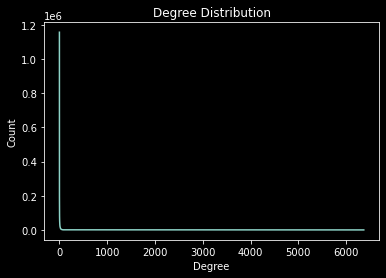

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.plot(deg, cnt)

plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")

plt.show()

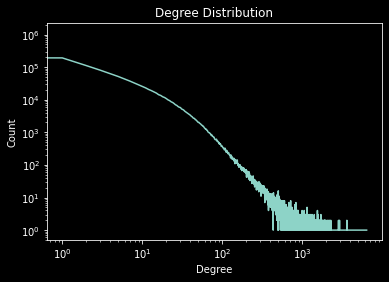

In [12]:
fig, ax = plt.subplots()
plt.loglog(deg, cnt)

plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")

plt.show()

# Create User Feature Database

In [21]:
user_df = df[['user_id', 'review_count', 'useful', 'funny',
       'cool', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos']]

user_df.set_index('user_id', inplace=True)

user_df

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
user_id,,,,,,,,,,,,,,,,,
q_QQ5kBBwlCcbL1s4NVK3g,1220,15038,10030,11291,1357,3.85,1710,163,190,361,147,1212,5691,2541,2541,815,323
dIIKEfOgo0KqUfGQvGikPg,2136,21272,10289,18046,1025,4.09,1632,87,94,232,96,1187,3293,2205,2205,472,294
D6ErcUnFALnCQN4b1W_TlA,119,188,128,130,16,3.76,22,1,3,0,0,5,20,31,31,3,1
JnPIjvC0cmooNDfsa9BmXg,987,7234,4722,4035,420,3.77,1180,129,93,219,90,1120,4510,1566,1566,391,326
37Hc8hr3cw0iHLoPzLK6Ow,495,1577,727,1124,47,3.72,248,19,32,16,15,77,131,310,310,98,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OrXXOTSQG2hLEoZ4sw03Gg,1,0,1,0,0,1.00,0,0,0,0,0,0,0,0,0,0,0
pYZ4Dyx5I92u5gDfGiVTpQ,3,0,0,0,0,4.33,0,0,0,0,0,0,0,0,0,0,0
DhrXTJRTLhnvI9UI1q63mg,10,3,0,2,0,4.20,0,0,0,0,0,0,1,0,0,0,0


In [22]:
from sklearn.preprocessing import MinMaxScaler

x = user_df.values
scaled = MinMaxScaler().fit_transform(x)
user_features = pd.DataFrame(scaled, columns=user_df.columns, index=user_df.index)

user_features.head()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
user_id,,,,,,,,,,,,,,,,,
q_QQ5kBBwlCcbL1s4NVK3g,0.077776,0.073579,0.058300,0.056896,0.112001,0.7125,0.067578,0.012073,0.013399,0.026439,0.011603,0.031627,0.062636,0.054228,0.054228,0.052764,0.003909
dIIKEfOgo0KqUfGQvGikPg,0.136172,0.104081,0.059806,0.090934,0.084599,0.7725,0.064496,0.006444,0.006629,0.016991,0.007578,0.030974,0.036243,0.047057,0.047057,0.030558,0.003558
D6ErcUnFALnCQN4b1W_TlA,0.007586,0.000920,0.000744,0.000655,0.001321,0.6900,0.000869,0.000074,0.000212,0.000000,0.000000,0.000130,0.000220,0.000662,0.000662,0.000194,0.000012
JnPIjvC0cmooNDfsa9BmXg,0.062922,0.035395,0.027447,0.020332,0.034665,0.6925,0.046633,0.009555,0.006559,0.016039,0.007104,0.029226,0.049638,0.033420,0.033420,0.025314,0.003945
37Hc8hr3cw0iHLoPzLK6Ow,0.031557,0.007716,0.004226,0.005664,0.003879,0.6800,0.009801,0.001407,0.002257,0.001172,0.001184,0.002009,0.001442,0.006616,0.006616,0.006345,0.000532


In [23]:
user_features.to_csv("datasets/user_features.csv")